In [243]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from pandas.tseries.offsets import DateOffset
from ydata_profiling import ProfileReport

# Data Cleaning

In [201]:
# Read data
df_install = pd.read_csv('installs.txt', sep='\t')
df_start_target = pd.read_csv('app starts july.txt', sep='\t')
df_start = pd.read_csv('app starts.txt', sep='\t')
df_view_target = pd.read_csv('brochure views july.txt', sep='\t')
df_view = pd.read_csv('brochure views.txt', sep='\t')

In [202]:
df_install.head(5)

,id,InstallDate,productId,userId,model,campaignId
0,37371890,2017-05-04 10:06:27.8070000,de.kaufda.kaufda,5fc13850-de51-4426-96ce-72aaec895abb,"ipad2,7",000000
1,36979918,2017-04-24 09:27:16.1730000,com-bonial-kaufda,b13a035e-e9bf-49db-8f93-b49d491bef53,sm-g800f,3iikhy
2,37371070,2017-05-04 16:05:09.5680000,de.kaufda.kaufda,5deb0aad-43bb-4ee1-868b-98f36c3d5bbf,"iphone8,4",tl3cy8
3,36897929,2017-04-22 13:18:18.4370000,com-bonial-kaufda,64707e97-d5e1-4622-a89a-bebf8432fd33,sm-g955f,000000
4,36606053,2017-04-15 14:03:51.1990000,com-bonial-kaufda,770a391d-eda5-423b-b672-845f1e12661f,sm-j320h,000000


In [203]:
# Checking data types
df_install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20000 non-null  int64 
 1   InstallDate  20000 non-null  object
 2   productId    20000 non-null  object
 3   userId       20000 non-null  object
 4   model        19963 non-null  object
 5   campaignId   20000 non-null  object
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [204]:
# Fixing data types
df_install['InstallDate'] = pd.to_datetime(df_install['InstallDate'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # Truncating to date
df_install = df_install.convert_dtypes()

In [205]:
df_install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           20000 non-null  Int64         
 1   InstallDate  20000 non-null  datetime64[ns]
 2   productId    20000 non-null  string        
 3   userId       20000 non-null  string        
 4   model        19963 non-null  string        
 5   campaignId   20000 non-null  string        
dtypes: Int64(1), datetime64[ns](1), string(4)
memory usage: 957.2 KB


In [206]:
# Checking duplicates in installs
df_install.groupby('userId').filter(lambda x: len(x) > 2)

,id,InstallDate,productId,userId,model,campaignId


In [207]:
df_view.head(5)

,id,userId,dateCreated,page_turn_count,view_duration,brochure_id
0,6269194661,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:09.5390000,30,95172.0,672239440
1,6269192581,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:47:00.6970000,2,4000.0,673861625
2,6269188351,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:39.9170000,1,14000.0,660764240
3,6204426632,fa623647-dfc9-49b4-bbb6-77cbacd599f4,2017-04-30 23:46:13.5970000,64,168000.0,672658544
4,6204424112,9491a960-206a-4a58-9177-e78cb1f05e70,2017-04-30 23:46:02.1970000,1,33000.0,660764240


In [208]:
df_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279213 entries, 0 to 279212
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               279213 non-null  int64  
 1   userId           279213 non-null  object 
 2   dateCreated      279213 non-null  object 
 3   page_turn_count  279213 non-null  int64  
 4   view_duration    269602 non-null  float64
 5   brochure_id      279213 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 12.8+ MB


In [209]:
# Fixing data types
df_view['dateCreated'] = pd.to_datetime(df_view['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_view = df_view.convert_dtypes()

df_view_target['dateCreated'] = pd.to_datetime(df_view_target['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_view_target = df_view_target.convert_dtypes()

In [210]:
df_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279213 entries, 0 to 279212
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               279213 non-null  Int64         
 1   userId           279213 non-null  string        
 2   dateCreated      279213 non-null  datetime64[ns]
 3   page_turn_count  279213 non-null  Int64         
 4   view_duration    269602 non-null  Int64         
 5   brochure_id      279213 non-null  Int64         
dtypes: Int64(4), datetime64[ns](1), string(1)
memory usage: 13.8 MB


In [211]:
df_start.head(5)

,dateCreated,userId
0,2017-06-30 14:14:54.7930000,50e72534-a4f4-40d7-96d5-ecbe4eb314e9
1,2017-06-30 14:03:13.0100000,b3712849-595e-403f-84d2-4698439056b0
2,2017-06-28 16:26:48.3830000,99cea50b-3ecf-4102-8290-997eaf32a6b6
3,2017-06-27 10:23:29.9430000,78c06433-9ea8-4835-aff5-f64b262d0fb4
4,2017-06-27 10:11:27.6340000,510c5f9e-de54-45ee-909c-c14103130e5e


In [212]:
# Fixing Data Types
df_start['dateCreated'] = pd.to_datetime(df_start['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_start = df_start.convert_dtypes() # fixing data types
df_start_target['dateCreated'] = pd.to_datetime(df_start_target['dateCreated'], format='%Y-%m-%d %H:%M:%S.%f').dt.normalize() # truncating to date
df_start_target = df_start_target.convert_dtypes() # fixing data types

In [213]:
df_start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144104 entries, 0 to 144103
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   dateCreated  144104 non-null  datetime64[ns]
 1   userId       144104 non-null  string        
dtypes: datetime64[ns](1), string(1)
memory usage: 2.2 MB


# Data Modeling

Calculating Features in Event Window

In [214]:
# Number of Active users at the begining of interval
# Number of users lost
# churn rate
# Cohort Analysis
# Event --- cut_off date -- Performance Window

We have two approaches to choose from. The first, simpler approach involves aggregating user data and deriving relevant features without considering time dependency or event sequence. We can then use this data model to train our churn prediction model, capturing the event sequence using appropriate features.

The second approach focuses on utilizing the event sequence of each customer as our data model. By employing time series-related models, we can predict churn by analyzing the chronological order of events.

In [215]:
# history_window_start= min([df_feature['InstallDate'].min(), df_feature['dateCreated'].min()]).date()
# history_window_end= max([df_feature['InstallDate'].max(), df_feature['dateCreated'].max()]).date()
history_window_start = pd.to_datetime('2017-04-01', format='%Y-%m-%d')
history_window_end = pd.to_datetime('2017-06-01', format='%Y-%m-%d')
prediction_window_start = pd.to_datetime('2017-07-01', format='%Y-%m-%d')
install_end_date = history_window_end - DateOffset(months=1)

In [216]:
# filter users who have not enough activity
df_install = df_install.loc[df_install['InstallDate'] < install_end_date]
# Installs has no duplicates, no need to aggragate

In [217]:
# Calculating average days between starts, to have app openning frequency
df_start = df_start.sort_values(['userId','dateCreated'])

df_ = df_start.groupby('userId').apply(
    lambda df: (df.dateCreated - df.dateCreated.shift(1)).dt.days).reset_index()

df_ = df_.rename(columns={'dateCreated': 'time_between_starts'})
df_.index = df_.level_1
# pd.merge(df_start, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one')
df_start = df_start.join(df_['time_between_starts'])

# Aggregating Starts Events based on users
df_starts_agg = df_start.groupby('userId').agg(
    first_start = pd.NamedAgg(column='dateCreated', aggfunc='min'),
    last_start = pd.NamedAgg(column='dateCreated', aggfunc='max'),
    avg_starting_frequency = pd.NamedAgg(column='time_between_starts', aggfunc='mean'),
    ).reset_index()

df_ = df_start.copy(deep=True)
df_ = df_.assign(count=1).groupby(['userId', pd.Grouper(key='dateCreated', freq='W')])['count'].sum().reset_index()
df_ = df_.groupby('userId').agg(avg_weekly_starts = pd.NamedAgg(column='count', aggfunc='mean'))
df_starts_agg= pd.merge(df_starts_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one')

In [218]:
df_starts_agg.head()

,userId,first_start,last_start,avg_starting_frequency,avg_weekly_starts
0,0000bb01-a52b-4b4c-a0dd-8ef80f0a810c,2017-05-08,2017-05-08,NaN,1.0
1,0002c218-d30f-402e-ae08-1280ad4fb669,2017-04-24,2017-04-29,0.625000,9.0
2,000691c6-4289-47f8-81f1-628e52ed5429,2017-04-25,2017-04-25,NaN,1.0
3,00095350-9e64-4b34-9112-b9869703248b,2017-04-07,2017-04-08,1.000000,2.0
4,00095653-80f8-4fba-93d9-44ae70bb6263,2017-05-09,2017-06-21,14.333333,1.0


In [222]:
# Concatenating starts and views events to have all activities of users in one place in order to use it in feature engineering
df_start_ = df_start.copy()
df_view_ = df_view.copy()
df_start_ ['event_type'] = 'start'
df_view_ ['event_type'] = 'view'
df_event = pd.concat([df_start_.assign(count=1), df_view_.assign(count=1)[['dateCreated','userId']]],axis=0, ignore_index= True)
df_event= df_event.groupby(['userId', 'event_type', pd.Grouper(key='dateCreated', freq='d')])['count'].sum().reset_index().drop('count',axis=1) # daily aggregation

In [223]:
# Aggregating events 
df_event_agg = df_event.groupby('userId').agg(
    first_event = pd.NamedAgg(column='dateCreated', aggfunc='min'),
    last_event = pd.NamedAgg(column='dateCreated', aggfunc='max'),
    ).reset_index()

In [224]:
df_ = df_event.copy(deep=True)
df_ = df_.assign(count=1).groupby(['userId', pd.Grouper(key='dateCreated', freq='W')])['count'].sum().reset_index()
df_ = df_.groupby('userId').agg(avg_weekly_active_days = pd.NamedAgg(column='count', aggfunc='mean'))

# merge the calculated metric back to the dataframe
df_event_agg = pd.merge(df_event_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicate

In [225]:
#Calculating average time between events for each user - if user has one event this value would be null
df_ = df_event[['userId','dateCreated']].copy(deep=True)
df_ = df_.drop_duplicates()
df_ = df_.sort_values(['userId','dateCreated'])
df_ = df_.groupby('userId').apply(
    lambda df: (df.dateCreated - df.dateCreated.shift(1)).dt.days).reset_index()

df_ = df_.rename(columns={'dateCreated': 'time_between_events'})
df_.index = df_.level_1
df_ = df_.groupby('userId').agg( avg_activity_frequency = pd.NamedAgg(column='time_between_events', aggfunc='mean'))

# merge the calculated metric back to the dataframe
df_event_agg = pd.merge(df_event_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicate

In [226]:
df_event_agg.head()

,userId,first_event,last_event,avg_weekly_active_days,avg_activity_frequency
0,0000bb01-a52b-4b4c-a0dd-8ef80f0a810c,2017-05-08,2017-05-08,1.0,NaN
1,0002c218-d30f-402e-ae08-1280ad4fb669,2017-04-24,2017-04-29,5.0,1.250000
2,000691c6-4289-47f8-81f1-628e52ed5429,2017-04-25,2017-04-25,1.0,NaN
3,00095350-9e64-4b34-9112-b9869703248b,2017-04-07,2017-04-08,2.0,1.000000
4,00095653-80f8-4fba-93d9-44ae70bb6263,2017-05-09,2017-06-21,1.0,14.333333


In [229]:
df_view_agg = df_view.groupby('userId').agg(
    last_view = pd.NamedAgg(column='dateCreated', aggfunc='max'),
    first_view = pd.NamedAgg(column='dateCreated',aggfunc='min'),
    med_page_turn = pd.NamedAgg(column='page_turn_count', aggfunc='median'),
    avg_view_duration = pd.NamedAgg(column='view_duration', aggfunc='mean')
    ).reset_index()

df_ = df_view.copy(deep=True)
df_ = df_.groupby(['userId', pd.Grouper(key='dateCreated', freq='W')])['brochure_id'].size().reset_index()
df_ = df_.groupby('userId').agg(avg_weekly_views = pd.NamedAgg(column='brochure_id', aggfunc='mean'))

df_view_agg= pd.merge(df_view_agg, df_, left_on='userId', right_on='userId', how='left' , validate='one_to_one')

In [230]:
df_view_agg.head()

,userId,last_view,first_view,med_page_turn,avg_view_duration,avg_weekly_views
0,0002C218-D30F-402E-AE08-1280AD4FB669,2017-04-29,2017-04-24,10.0,51789.473684,19.000000
1,00095350-9e64-4b34-9112-b9869703248b,2017-04-08,2017-04-07,20.0,70863.0,5.000000
2,00095653-80f8-4fba-93d9-44ae70bb6263,2017-06-18,2017-05-09,4.0,35500.0,1.333333
3,0010E3BE-81BD-48A3-8282-8C8D0B1F9629,2017-06-30,2017-04-18,8.0,67338.9425,37.454545
4,0015a4a8-99f1-4119-9e10-0ac9773ae48a,2017-05-08,2017-05-08,2.0,69000.0,3.000000


In [268]:
# Joining all data frames to have a unified table at user level
df_tmp = pd.merge(df_install, df_starts_agg, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicate
df_tmp2 = pd.merge(df_tmp, df_event_agg, left_on='userId', right_on='userId', how='left', validate='one_to_one' ) # validating there is no duplicate
df_feature = pd.merge(df_tmp2, df_view_agg, left_on='userId', right_on='userId', how='left' , validate='one_to_one') # validating there is no duplicates

In [269]:
df_feature.head(3)

,id,InstallDate,productId,userId,model,campaignId,first_start,last_start,avg_starting_frequency,avg_weekly_starts,first_event,last_event,avg_weekly_active_days,avg_activity_frequency,last_view,first_view,med_page_turn,avg_view_duration,avg_weekly_views
0,36979918,2017-04-24,com-bonial-kaufda,b13a035e-e9bf-49db-8f93-b49d491bef53,sm-g800f,3iikhy,2017-04-24,2017-05-18,12.000000,1.5,2017-04-24,2017-05-18,1.500000,12.0,NaT,NaT,<NA>,<NA>,NaN
1,36897929,2017-04-22,com-bonial-kaufda,64707e97-d5e1-4622-a89a-bebf8432fd33,sm-g955f,000000,2017-04-22,2017-06-26,4.642857,2.5,2017-04-22,2017-06-26,2.333333,5.0,2017-06-26,2017-04-23,25.0,51818.181818,2.2
2,36606053,2017-04-15,com-bonial-kaufda,770a391d-eda5-423b-b672-845f1e12661f,sm-j320h,000000,2017-04-15,2017-04-21,2.000000,2.0,2017-04-15,2017-04-21,2.000000,2.0,2017-04-21,2017-04-15,18.0,93333.333333,7.5


Adding more features to enrich the data model

In [270]:
def calculate_day_diff(in_date, ref_date):
    return (ref_date - in_date).days

In [271]:
df_feature['tenure'] = df_feature['InstallDate'].apply(calculate_day_diff, args=(prediction_window_start,)) # client tenure at the start of prediction window
df_feature['active_age'] = (df_feature['last_event'] - df_feature['first_event']).dt.days
df_feature['recency'] = (df_feature['last_event'] - df_feature['InstallDate']).dt.days
df_feature['has_event'] = df_feature['first_event'].notna().astype(int)
df_feature['has_start'] = df_feature['first_start'].notna().astype(int)
df_feature['has_view'] = df_feature['first_view'].notna().astype(int)

Renaming columns to be consistent and easier to use

In [272]:
df_feature.columns

Index(['id', 'InstallDate', 'productId', 'userId', 'model', 'campaignId',
       'first_start', 'last_start', 'avg_starting_frequency',
       'avg_weekly_starts', 'first_event', 'last_event',
       'avg_weekly_active_days', 'avg_activity_frequency', 'last_view',
       'first_view', 'med_page_turn', 'avg_view_duration', 'avg_weekly_views',
       'tenure', 'active_age', 'recency', 'has_event', 'has_start',
       'has_view'],
      dtype='object')

In [273]:
df_feature.rename(columns={'InstallDate':'install_date',
                           'productId':'product_id',
                           'userId':'user_id',
                           'campaignId':'campaign_id'}, inplace=True)

In [274]:
df = df_feature.drop(['install_date','first_start','last_start','first_event','last_event','first_view','last_view', 'id'], axis=1)

In [277]:
df = df[['avg_starting_frequency','avg_weekly_starts','avg_weekly_active_days','avg_activity_frequency','med_page_turn','avg_view_duration','avg_weekly_views','tenure','active_age','recency']].fillna(0)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_starting_frequency  9843 non-null   float64
 1   avg_weekly_starts       9843 non-null   float64
 2   avg_weekly_active_days  9843 non-null   float64
 3   avg_activity_frequency  9843 non-null   float64
 4   med_page_turn           9843 non-null   Float64
 5   avg_view_duration       9843 non-null   Float64
 6   avg_weekly_views        9843 non-null   float64
 7   tenure                  9843 non-null   int64  
 8   active_age              9843 non-null   float64
 9   recency                 9843 non-null   float64
dtypes: Float64(2), float64(7), int64(1)
memory usage: 788.3 KB


In [279]:
df.head()

,avg_starting_frequency,avg_weekly_starts,avg_weekly_active_days,avg_activity_frequency,med_page_turn,avg_view_duration,avg_weekly_views,tenure,active_age,recency
0,12.000000,1.5,1.500000,12.0,0.0,0.0,0.0,68,24.0,24.0
1,4.642857,2.5,2.333333,5.0,25.0,51818.181818,2.2,70,65.0,65.0
2,2.000000,2.0,2.000000,2.0,18.0,93333.333333,7.5,77,6.0,6.0
3,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,89,0.0,0.0
4,0.000000,1.0,1.000000,0.0,6.0,97428.571429,7.0,75,0.0,0.0


In [281]:
# profile = ProfileReport(df, title="Profiling Report")
# profile

In [30]:
# check error
df_feature[df_feature['install_date']> df_feature['first_event']]

df_test = df.loc[(df['has_view']==1) & (df['has_start']==1) ]

,id,install_date,product_id,user_id,model,campaign_id,first_start,last_start,start_count,first_event,...,last_view,first_view,view_count,avg_page_turn,avg_view_duration,tenure,recency,has_event,has_start,has_view
1674,36077316,2017-04-03,com-bonial-kaufda,bfa8101b-eb62-4398-9445-112401e6253f,P00A,j6lo2z,2017-04-03,2017-04-03,1.0,2017-04-02,...,2017-04-02,2017-04-02,4.0,12.0,83750.0,89,0 days,1,1,1
4792,36953957,2017-04-22,de-kaufda-android,5c8ac6dc-1a7b-45fc-85d5-8e30d607c9ba,sm-j100h,000000,2017-04-20,2017-04-22,2.0,2017-04-20,...,NaT,NaT,NaN,<NA>,<NA>,70,0 days,1,1,0
5529,36444559,2017-04-10,de-kaufda-android,ffcbe54b-66a0-4cd7-ae7a-967d9e21e8a9,gt-i9300,000000,2017-04-02,2017-04-10,3.0,2017-04-02,...,2017-04-10,2017-04-10,1.0,1.0,<NA>,82,0 days,1,1,1
6436,37062598,2017-04-26,de-kaufda-android,6bbfe19f-a1c6-48b2-8221-76856a22c57e,sm-t116,000000,2017-04-22,2017-04-26,2.0,2017-04-22,...,NaT,NaT,NaN,<NA>,<NA>,66,0 days,1,1,0


Note: How many user viewed or start the app after install?

<Axes: xlabel='step'>

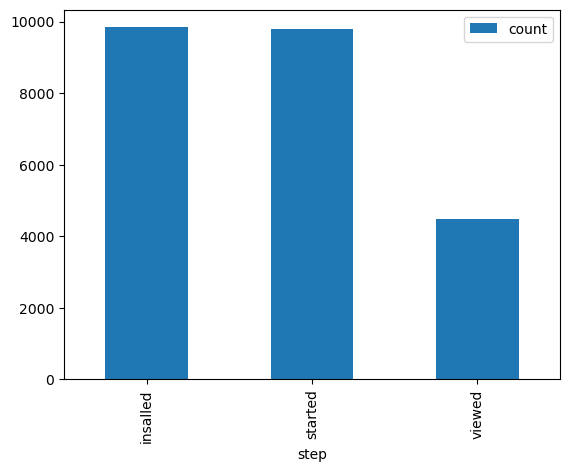

In [31]:
# Visualizing customer drops in different steps
data_viz = [['insalled', df_feature.user_id.size], ['started', df_feature.has_start.sum()], ['viewed', df_feature.has_view.sum()]]

df_viz = pd.DataFrame(data_viz, columns=['step', 'count'])
df_viz.plot.bar(x='step',y='count')

Delay Churn Labeling: Users who installed the app at the end of June need some time to exhibit churn behavior
Minimum Interaction Requirement: et a minimum interaction threshold. Users who haven't viewed any ads may not provide meaningful data for churn prediction. You can choose to exclude them from the analysis if they haven't interacted with the app in a meaningful way, such as not viewing any ads or not performing key actions.
Feature Engineering: Consider adding features that account for the recency of user interactions. For users who installed the app at the end of June, you can create features like "time since installation" and "time since the first ad view" to capture their behavior more

# Defining Churn
We classify churn as the absence of any activity. Hence, if a user initiated the app or accessed any brochures during the target month, we regard them as not having churned.

In [282]:
active_view = df_view_target['userId'].drop_duplicates()
active_start = df_start_target['userId'].drop_duplicates()
active_users = pd.concat([active_view, active_start]).drop_duplicates()

In [283]:
df.columns

Index(['avg_starting_frequency', 'avg_weekly_starts', 'avg_weekly_active_days',
       'avg_activity_frequency', 'med_page_turn', 'avg_view_duration',
       'avg_weekly_views', 'tenure', 'active_age', 'recency'],
      dtype='object')

In [263]:
# there are some users who don't have any view activity in history but they didn't churned
df_nc = df.loc[(df['has_view']==0) & (df['has_start']==1) ]
a = pd.merge(df_nc, active_users, left_on='user_id', right_on='userId', how='inner' , validate='one_to_one', indicator=True)

In [286]:
# Calculating Churn label
df = pd.merge(df_feature, active_users, left_on='user_id', right_on='userId', how='left' , validate='one_to_one', indicator=True)
df['churn'] = np.where(df['_merge']== 'both', 1, 0)
df = df.drop(columns=['_merge'])

In [288]:
# Churn Rate by Product
df_churn_product = df.groupby('product_id').agg(
    churn = pd.NamedAgg(column='churn', aggfunc='sum'),
    total = pd.NamedAgg(column= 'user_id', aggfunc=pd.Series.nunique)
).reset_index()
df_churn_product['churn_rate'] = 100*df_churn_product['churn']/df_churn_product['total']
df_churn_product.head()

,product_id,churn,total,churn_rate
0,com-bonial-kaufda,1419,4897,28.976925
1,de-kaufda-android,355,3226,11.004340
2,de.kaufda.kaufda,519,1720,30.174419


<Axes: xlabel='product_id'>

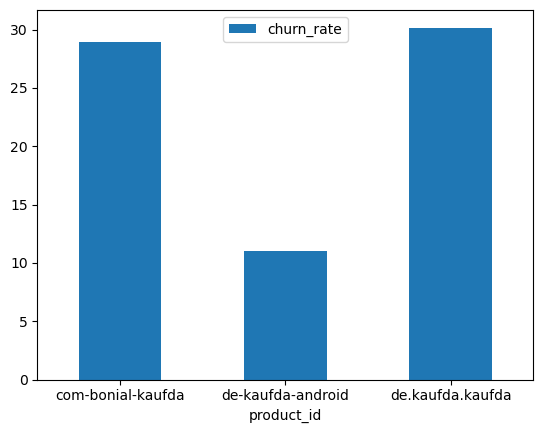

In [290]:
df_churn_product.plot.bar(x='product_id', y='churn_rate', rot=0)

# EDA

In [ ]:
# Removing High Correlated Features